In [8]:
import torch
from pyannote.database import get_protocol, FileFinder

emb = torch.hub.load('pyannote/pyannote-audio', 'emb')
sad = torch.hub.load('pyannote/pyannote-audio', 'sad_dihard')
print(f'Embedding has dimension {emb.dimension:d}.')

Using cache found in /home/jovyan/.cache/torch/hub/pyannote_pyannote-audio_master


Embedding has dimension 512.


Using cache found in /home/jovyan/.cache/torch/hub/pyannote_pyannote-audio_master


In [2]:
preprocessors = {'audio': FileFinder()}
# protocol = get_protocol('VOXSRC21.SpeakerDiarization.Challenge', preprocessors=preprocessors)
protocol = get_protocol('VOXCON.SpeakerDiarization.VoxConverse', preprocessors=preprocessors)

In [3]:
import time

test_file = next(protocol.test())
uri = test_file['uri']
embeddings = emb(test_file)
# print(uri, time.strftime("%H:%M:%S"))
sad_scores = sad(test_file)
# print(uri, time.strftime("%H:%M:%S"))

# chunks = embeddings.sliding_window
# print(f'Embeddings were extracted every {1000 * chunks.step:g}ms on {1000 * chunks.duration:g}ms-long windows.')
# print(embeddings.data.shape)

aepyx 20:21:26
aepyx 20:21:40


In [9]:
# binarize raw SAD scores
from pyannote.audio.utils.signal import Binarize
# binarize = Binarize(offset=0.52, onset=0.52, log_scale=True, 
#                     min_duration_off=0.1, min_duration_on=0.1)
binarize = Binarize(min_duration_off=0.6315121069334447, min_duration_on=0.0007366523493967721, offset=0.5727193137037349, onset=0.5842225805454029, log_scale=True)

# speech regions (as `pyannote.core.Timeline` instance)
speech = binarize.apply(sad_scores, dimension=1)

In [76]:
segments=[s for s in speech if s.duration > 1]
for segments in segments:
    

[<Segment(2.45534, 18.3347)>,
 <Segment(19.003, 27.103)>,
 <Segment(28.2167, 33.3838)>,
 <Segment(34.3947, 87.6167)>,
 <Segment(88.8064, 89.9353)>,
 <Segment(90.9141, 92.6185)>,
 <Segment(94.8409, 96.6567)>,
 <Segment(97.492, 99.6604)>,
 <Segment(100.349, 104.011)>,
 <Segment(105.141, 113.412)>,
 <Segment(114.07, 149.312)>,
 <Segment(149.951, 157.081)>,
 <Segment(158.051, 160.908)>,
 <Segment(162.768, 164.135)>,
 <Segment(165.935, 169.16)>]

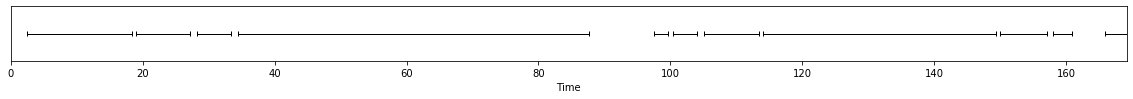

In [29]:
from pyannote.core import Timeline
long_turns = Timeline(segments=[s for s in speech if s.duration > 2.])
long_turns

In [40]:
X.shape

(11, 512)

In [44]:
Y

['spk01',
 'spk01',
 'spk00',
 'spk00',
 'spk01',
 'spk00',
 'spk01',
 'spk00',
 'spk00',
 'spk03',
 'spk03']

In [43]:
X, Y = [], []
for segment in long_turns:
    print(segment)
    # "strict" only keeps embedding strictly included in segment
    x = embeddings.crop(segment, mode='center')
    # average speech turn embedding
    X.append(np.mean(x, axis=0))

    # keep track of speaker label (for later scatter plot)
    y = test_file['annotation'].argmax(segment)
    Y.append(y)

X = np.vstack(X)
# _, y_true = np.unique(Y, return_inverse=True)


[ 00:00:02.455 -->  00:00:18.334]
[ 00:00:19.002 -->  00:00:27.102]
[ 00:00:28.216 -->  00:00:33.383]
[ 00:00:34.394 -->  00:01:27.616]
[ 00:01:37.491 -->  00:01:39.660]
[ 00:01:40.348 -->  00:01:44.010]
[ 00:01:45.141 -->  00:01:53.411]
[ 00:01:54.069 -->  00:02:29.311]
[ 00:02:29.951 -->  00:02:37.080]
[ 00:02:38.051 -->  00:02:40.908]
[ 00:02:45.935 -->  00:02:49.160]


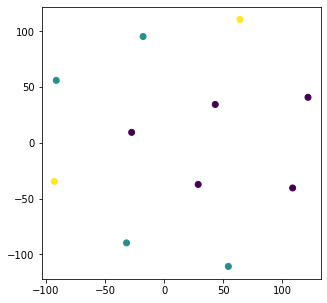

In [46]:
# apply tSNE on embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, metric="cosine")
X_2d = tsne.fit_transform(X)

# plot 
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
plt.scatter(*X_2d.T, c=y_true)

512

In [67]:
embeddings.sliding_window.samples(librosa.get_duration(utter, sr=16000))

166

In [31]:
import librosa
audio_path = test_file['audio'].as_posix()
utter, sr = librosa.core.load(audio_path, sr=16000) 
librosa.get_duration(utter, sr=16000)

169.152

In [55]:
import math
for t in range(math.floor(librosa.get_duration(utter, sr=16000))):
    print(t, t+1)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
20 21
21 22
22 23
23 24
24 25
25 26
26 27
27 28
28 29
29 30
30 31
31 32
32 33
33 34
34 35
35 36
36 37
37 38
38 39
39 40
40 41
41 42
42 43
43 44
44 45
45 46
46 47
47 48
48 49
49 50
50 51
51 52
52 53
53 54
54 55
55 56
56 57
57 58
58 59
59 60
60 61
61 62
62 63
63 64
64 65
65 66
66 67
67 68
68 69
69 70
70 71
71 72
72 73
73 74
74 75
75 76
76 77
77 78
78 79
79 80
80 81
81 82
82 83
83 84
84 85
85 86
86 87
87 88
88 89
89 90
90 91
91 92
92 93
93 94
94 95
95 96
96 97
97 98
98 99
99 100
100 101
101 102
102 103
103 104
104 105
105 106
106 107
107 108
108 109
109 110
110 111
111 112
112 113
113 114
114 115
115 116
116 117
117 118
118 119
119 120
120 121
121 122
122 123
123 124
124 125
125 126
126 127
127 128
128 129
129 130
130 131
131 132
132 133
133 134
134 135
135 136
136 137
137 138
138 139
139 140
140 141
141 142
142 143
143 144
144 145
145 146
146 147
147 148
148 149
149 150
150 151
151 152
15

In [ ]:
labels = configs.icassp2018_clusterer.predict(embeddings.data)


annotation = Annotation()
annotation.uri = test_file['uri']
for idx, speaker_id in enumerate(labels):
    segment = Segment(idx, idx+1)
    annotation[segment] = speaker_id

hypothesis = annotation.support()
hypothesis

In [ ]:
import numpy as np
from IPython.display import display, clear_output
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

X, Y = [], []

fileIndex = 0

embeddings = embs[fileIndex]
length = len(embeddings)
# rttm = list(protocol.test())[fileIndex]["annotation"]
rttm = hypothesis

for id, (window, embedding) in enumerate(embeddings):
    # average speech turn embedding
    X.append(np.nanmean(embedding, axis=0))

    # keep track of speaker label (for later scatter plot)
    y = rttm.argmax(window)
    Y.append(y)
    clear_output(wait=True)
    display(f'{id+1} {100*(id+1)/length:g}%')

X = np.vstack(X)
_, y_true = np.unique(Y, return_inverse=True)

tsne = TSNE(n_components=2, metric="cosine")
X_2d = tsne.fit_transform(X)

# plot 
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
plt.clf()
plt.scatter(*X_2d.T, c=y_true)

Text(0.5, 0.1, 'speech activity detection')

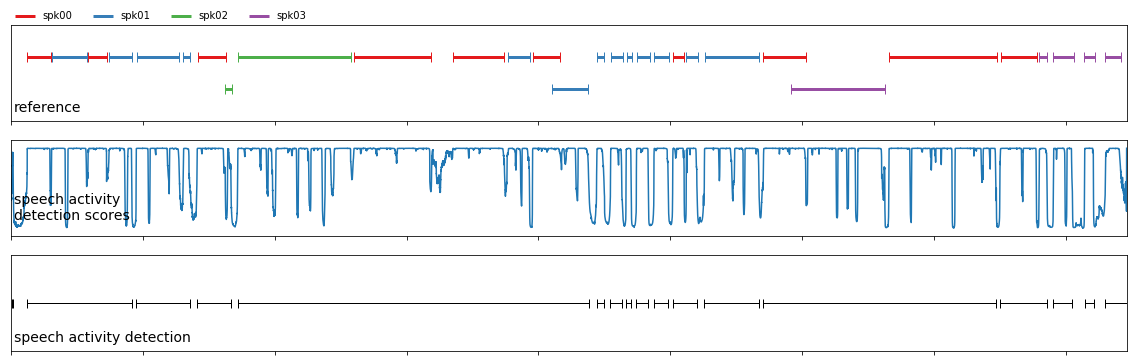

In [10]:
# let's visualize SAD, SCD and OVL results using pyannote.core visualization API
import numpy as np
from matplotlib import pyplot as plt
from pyannote.core import Segment, notebook
from pyannote.core import SlidingWindowFeature

# helper function to make visualization prettier
plot_ready = lambda scores: SlidingWindowFeature(np.exp(scores.data[:, 1:]), scores.sliding_window)

# create a figure with 8 rows with matplotlib
nrows = 3
fig, ax = plt.subplots(nrows=nrows, ncols=1)
fig.set_figwidth(20)
fig.set_figheight(nrows * 2)

# 1st row: reference annotation
notebook.plot_annotation(test_file['annotation'], ax=ax[0], time=False)
ax[0].text(notebook.crop.start + 0.5, 0.1, 'reference', fontsize=14)


# 2nd row: SAD raw scores
notebook.plot_feature(plot_ready(sad_scores), ax=ax[1], time=False)
ax[1].text(notebook.crop.start + 0.5, 0.1, 'speech activity\ndetection scores', fontsize=14)
ax[1].set_ylim(-0.1, 1.1)

# 3rd row: SAD result
notebook.plot_timeline(speech, ax=ax[2], time=False)
ax[2].text(notebook.crop.start + 0.5, 0.1, 'speech activity detection', fontsize=14)

In [ ]:
# for resource in protocol.test():
#     print(resource["audio"])
#     print(resource["uri"])

# test_file = next(protocol.test())
# test_file["audio"]

###########################################

# sw = SlidingWindow(duration=4, step=1, start=0.0, end=len(embeddings))

# for segment in sw:
#     # "strict" only keeps embedding strictly included in segment
#     x = embeddings.crop(segment, mode='strict')

############################################

# from pyannote.core import Segment
# import numpy as np

# for id, (window, emb) in enumerate(embeddings):
#     print(window, emb)
#     assert isinstance(window, Segment)
#     assert isinstance(emb, np.ndarray)